# Waffle plot function

The function has been based on the brilliant piece of code by Justin Fletcher, posted on Stack Overflow on 03 Jan 2017.

Link: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart

Discounting pywaffle and attempted use of squarify (another third-party library), it is the only viable piece of code I found, copied many times over by different people. Some of them added things to it, but it was mostly the same code. As the author states clearly, this solution is not finished. But it was a very good start.

I used fragments added in the same post in 18 Jun 2019 by Carlos García Rosales, mainly around the value_sign variable.

The idea behind building it was to create a reliable, simple-to-use yet customizable waffle plot that wouldn't require any not-widely-used libraries (and in general, the fewer libraries it uses, the better). It is supposed to be resilient enough to be used in most scenarios even in automated processing, much like plots in matplotlib.

Some improvements to the function were made by using ChatGPT. Namely removing the numpy library and replacing it with basic python code, removing one intermediate variable (a), and improving the docstring.

The software I'm working on:

python version: 3.10.7

numpy version: 1.23.4

matplotlib version: 3.6.0

### The function:

In [1]:
from waffle_plot_function import waffle_plot

### Examples

1. Basic use
2. Auto-scale
3. Over-represent
4. Resilience
5. Labels
6. Shapes
7. Colors
8. Other examples

#### 1. Basic use

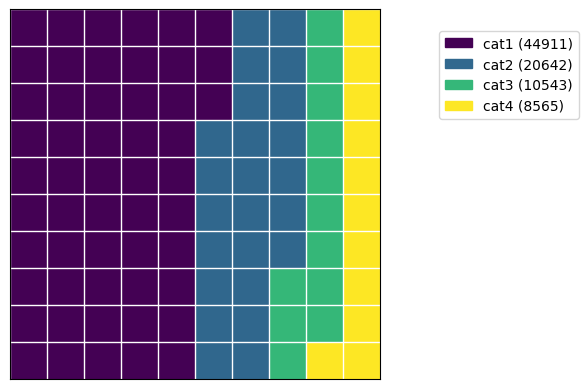

In [2]:
import pandas as pd

df = pd.DataFrame({'categories': ['cat1', 'cat2', 'cat3', 'cat4'], 
                   'values': [44911, 20642, 10543, 8565]})

waffle_plot(df['categories'], df['values'])

#### 2. Auto-scale

With the autoscale switched on, the function will adjust the number of tiles to accommodate the smallest non-zero category.

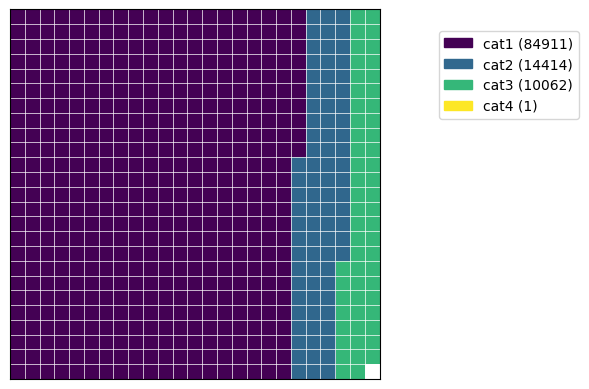

In [3]:
df1 = pd.DataFrame({ 'categories': ['cat1', 'cat2', 'cat3', 'cat4'], 
                    'values': [84911, 14414, 10062, 1] })


waffle_plot(df1['categories'], df1['values'])

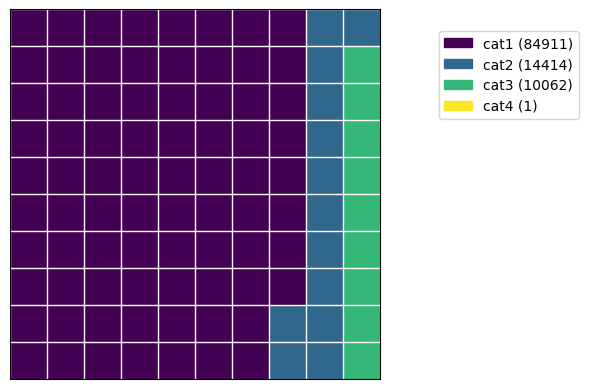

In [4]:
waffle_plot(df1['categories'], df1['values'], autoscale=False)

#### 3. Over-represent

It is set to False by default. When it is False, if the smallest category has one tile and fills less than 50% of it, the tile will adopt the color of the background.

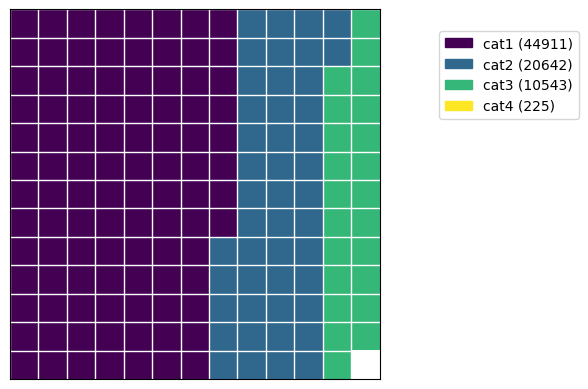

In [5]:
df2 = df.copy()
df2.loc[df2['categories'] == 'cat4', 'values'] = 225 # cat 4 is filling 0.4982 of the last tile
waffle_plot(df2['categories'], df2['values'])

Only when the smallest category has one tile and fills over 50% of it, the proper color will be assigned.

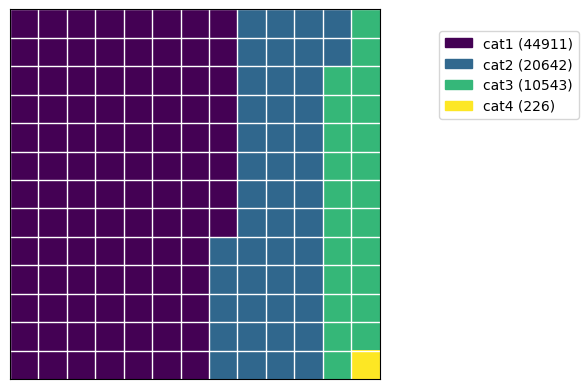

In [6]:
df2.loc[df2['categories'] == 'cat4', 'values'] = 226  # cat 4 is filling 0.5004 of the last tile
waffle_plot(df2['categories'], df2['values'])

If over_represent is True, the last tile will always be the color of the smallest non-zero value.

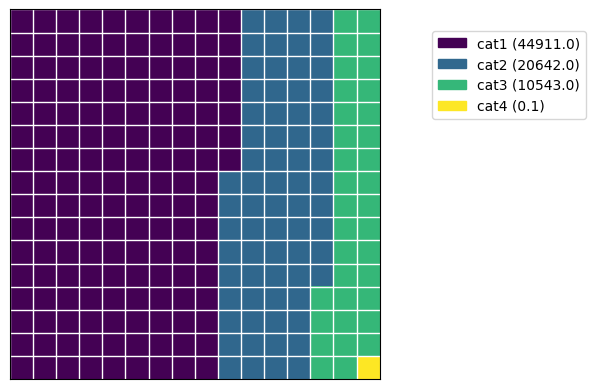

In [7]:
df2.loc[df2['categories'] == 'cat4', 'values'] = 0.1 # cat 4 is filling 0.0003 of the last tile
waffle_plot(df2['categories'], df2['values'], over_represent=True)

#### 4. Resilience

The function works with only one non-zero value:

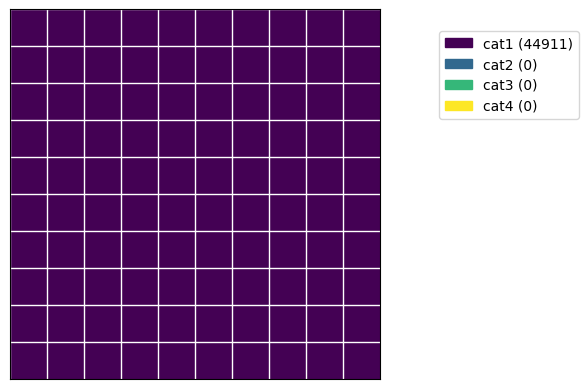

In [8]:
# Only one non-zero value
df3 = df.copy()
df3.loc[df3['categories'] != 'cat1', 'values'] = 0

waffle_plot(df3['categories'], df3['values'])

With only one value at all:

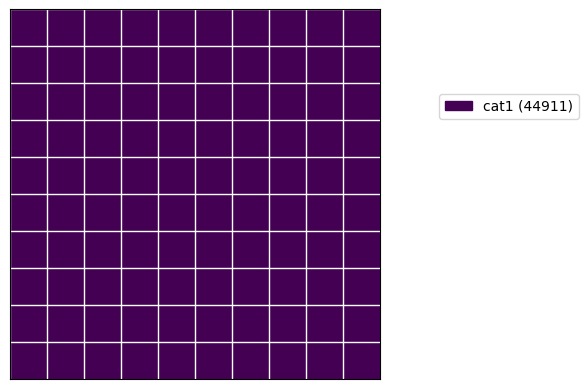

In [9]:
#Only one value present
df4 = df.head(1).copy()

waffle_plot(df4['categories'], df4['values'])

When there are no non-zero values, it will still work, with the grey tiles color.

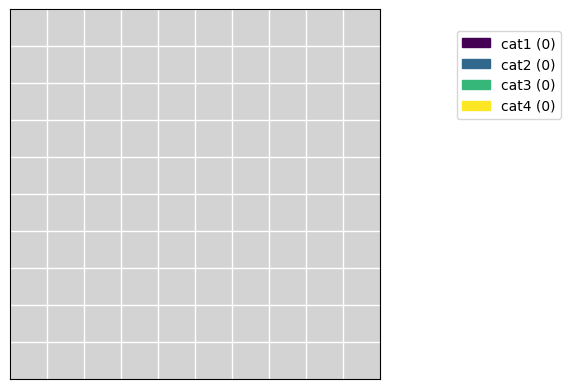

In [10]:
df5 = df.copy()
df5['values'] = 0

waffle_plot(df5['categories'], df5['values'])

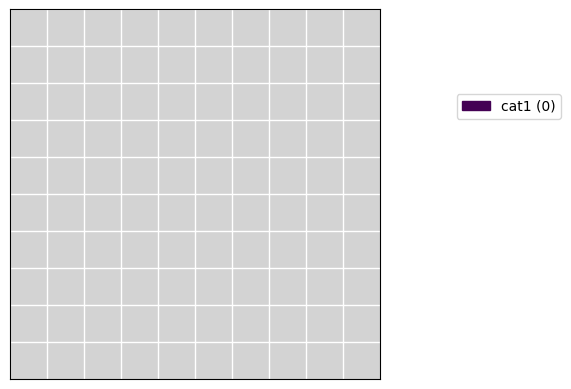

In [11]:
df6 = df.head(1).copy()
df6['values'] = 0

waffle_plot(df6['categories'], df6['values'])

#### 5. Labels

If the label value (label_v) is False, the category contains only the names of the categories.

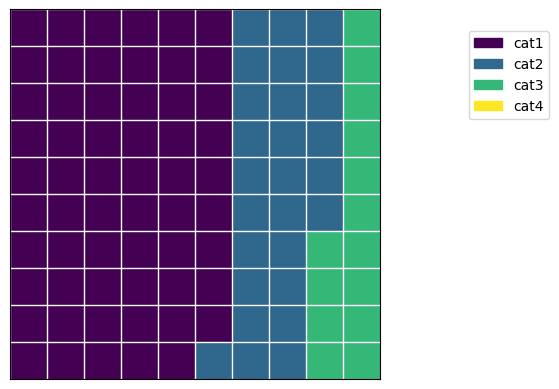

In [12]:
# one empty value
df7=df.copy()
df7.loc[df7['categories'] == 'cat4', 'values'] = 0

waffle_plot(df7['categories'], df7['values'], label_v=False)

If the label percentage (label_p) is True, the function will display the proportion of each category in the waffle.

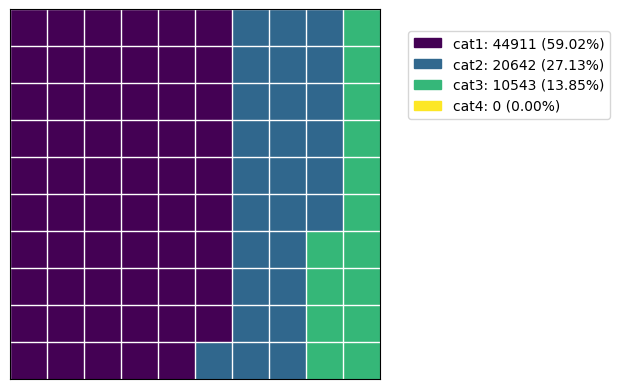

In [13]:
waffle_plot(df7['categories'], df7['values'], label_p=True)

The percentages can be displayed without values.

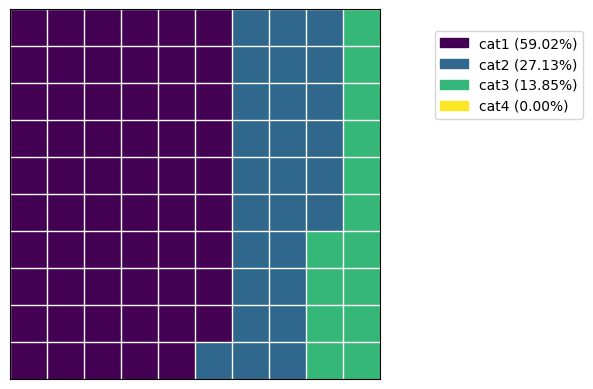

In [14]:
waffle_plot(df7['categories'], df7['values'], label_p=True, label_v=False)

Value sign (value_sign) can be added to the value.

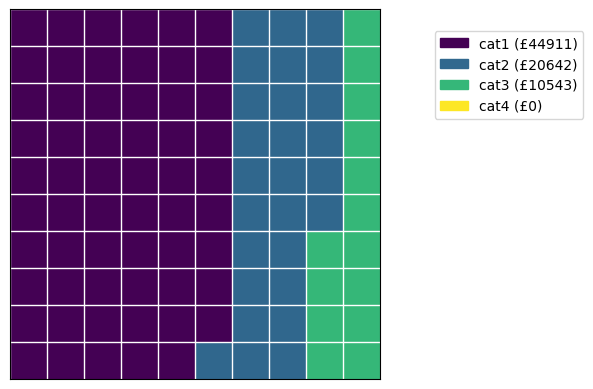

In [15]:
waffle_plot(df7['categories'], df7['values'], value_sign = '£')

If the value sign is a percentage, it will be shown after the actual value. Everything else will be on in front of the value.

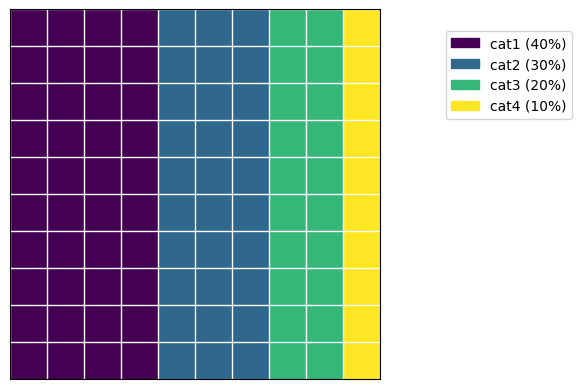

In [16]:
df8 = pd.DataFrame({ 'categories': ['cat1', 'cat2', 'cat3', 'cat4'], 
                    'values': [40, 30, 20, 10]})

waffle_plot(df8['categories'], df8['values'], value_sign = '%')

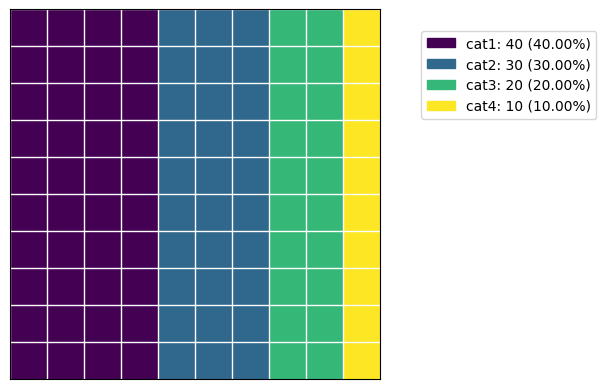

In [17]:
waffle_plot(df8['categories'], df8['values'], label_p=True)

#### 6. Shapes

Many aspects of the shape and size of the waffle plot can be controlled.

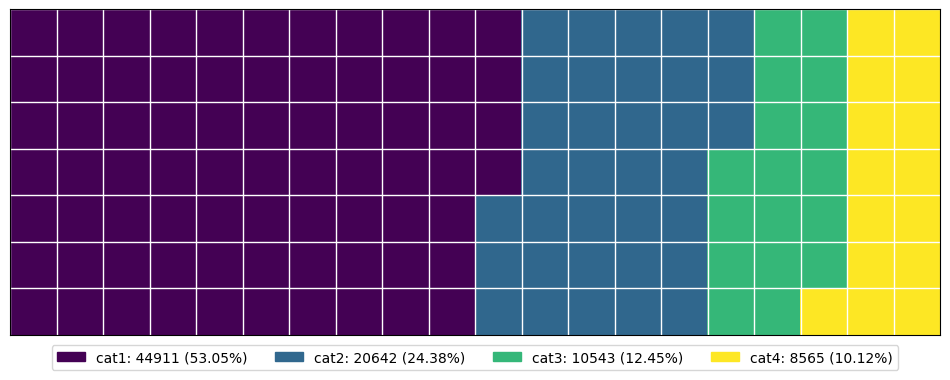

In [18]:
waffle_plot(df['categories'], df['values'], 20, 7, figsize=(12,7), 
            legend_ncols=len(df['categories']), legend_loc=(0.5, -0.13), label_p=True)

If autoscaling is switched on (default), it will add the same number of tiles in each dimension, so unless the waffle is square, it won't keep the exact proportions.

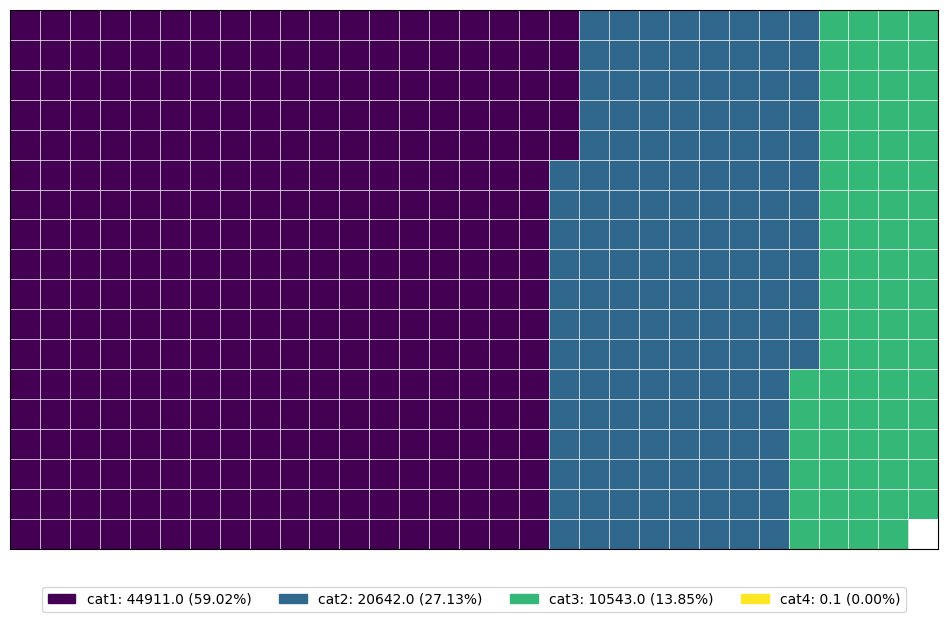

In [19]:
waffle_plot(df2['categories'], df2['values'], 20, 7, figsize=(12,7), 
            legend_ncols=len(df2['categories']), legend_loc=(0.5, -0.13), label_p=True)

To prevent this behaviour, autoscale should be switched off.

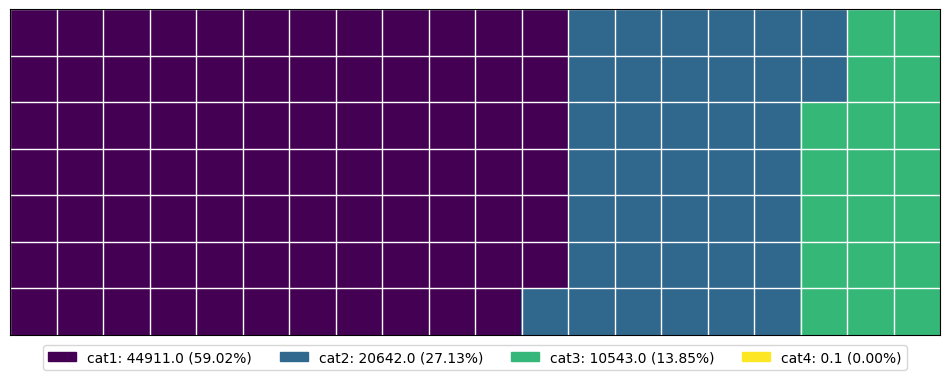

In [20]:
waffle_plot(df2['categories'], df2['values'], 20, 7, figsize=(12,7), autoscale=False,
            legend_ncols=len(df2['categories']), legend_loc=(0.5, -0.13), label_p=True)

The density and the accuracy of the plot can be adjusted by controlling the number of tiles.

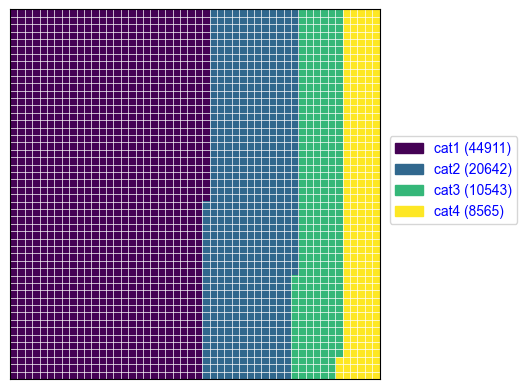

In [21]:
waffle_plot(df['categories'], df['values'], font_c='blue', font='Arial', height=50, width=50, legend_loc=(1.20, 0.40))

The alignment of tiles from vertical to horizontal can be changed by setting vertical variable to False.

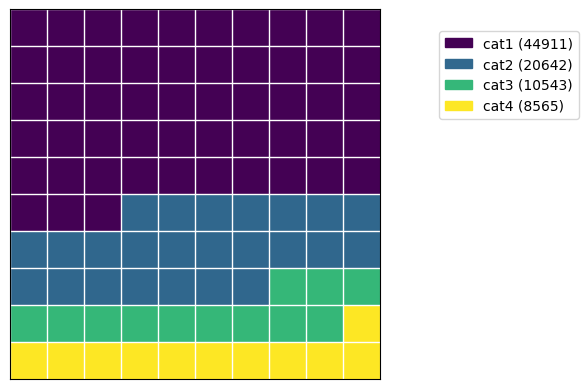

In [22]:
waffle_plot(df['categories'], df['values'], vertical=False)

#### 7. Colors

Different matplotlib colormaps can be used.

In [23]:
waffle_plot(df['categories'], df['values'], 20, 7, cmap=plt.cm.plasma, figsize=(12,7), legend_loc=(0.50,-0.11),
           legend_ncols=4)

NameError: name 'plt' is not defined

In [ ]:
waffle_plot(df['categories'], df['values'], 20, 7, cmap=plt.cm.cividis, figsize=(12,7), legend_loc=(0.50,-0.11),
           legend_ncols=4)

If a list of colors is assigned, those will be used instead of the cmap.

In [ ]:
waffle_plot(df['categories'], df['values'], 20, 7, c=['b', 'g', 'c', 'k'], figsize=(12,7), legend_loc=(0.50,-0.11),
           legend_ncols=4)

If too few colors are passed, the missing colors will be taken from the colormap.

In [ ]:
waffle_plot(df['categories'], df['values'], 20, 7, c=['b', 'g', 'c'], figsize=(12,7), legend_loc=(0.50,-0.11),
           legend_ncols=4)

Custom colors can be used:

In [ ]:
# Function to normalize rgb for matplotlib:

def rgb_norm(r, g, b):
    """
    It is simple normalising from rgb scale (0-255)
    The formula:
    #xs = (x – min(x)) / (max(x) – min(x))
    for rgb it would be:
    #v = (v-0) / (255-0)
    """
    r = r / 255
    g = g / 255
    b = b / 255
    
    return r, g, b

In [ ]:
# Creating some colors with rgb_norm

blackish = rgb_norm(17, 17, 17)
blueish = rgb_norm(58, 82, 139)
green = rgb_norm(89, 199, 100)
greenish = rgb_norm(191 ,223 ,39)

# Getting some colors from colormaps
violet = plt.cm.magma(50)
pinkish = plt.cm.magma(101)
orange = plt.cm.magma(188)
yellow = plt.cm.magma(243)

In [ ]:
waffle_plot(df['categories'], df['values'], c=[violet, pinkish, orange, yellow], bc=blackish)

In [ ]:
waffle_plot(df['categories'], df['values'], 20, 7, c=[violet, pinkish, orange, yellow], bc=blackish,
           figsize=(12,7), legend_ncols=len(df['categories']), legend_loc=(0.5, -0.13), label_p=True)

Font color can be changed:

In [ ]:
df9 = pd.DataFrame({ 'categories': ['a', 'b', 'c', 'd', 'e', 'f'], 
                    'values': [70, 31, 61, 10, 44, 90] })

waffle_plot(df9['categories'], df9['values'], 20, 7, cmap=plt.cm.plasma, bc=blackish,
           figsize=(13,7), legend_ncols=len(df9['categories']), legend_loc=(0.5, -0.12), label_p=True,
            value_sign='$', font_c='darkblue')

#### 8. Other examples

You can experiment with how the plot looks.

In [ ]:
waffle_plot(df['categories'], df['values'], cmap=plt.cm.plasma, figsize=(12,7), legend_loc=(0.50,-0.11),
           legend_ncols=4, vertical=False)

In [ ]:
df9 = pd.DataFrame({ 'categories': ['a', 'b', 'c', 'd', 'e', 'f'], 
                    'values': [70, 31, 61, 10, 44, 90] })

waffle_plot(df9['categories'], df9['values'], 20, 7, cmap=plt.cm.plasma, bc=blackish,
           figsize=(13,7), legend_loc=(1.1, 0.54), label_p=True,
            value_sign='$', font_c='black', fontsize=12)

In [ ]:
df10 = pd.DataFrame({'categories': ['cat1', 'cat2', 'cat3', 'cat4'], 
                   'values': [2.3, 0.723, 1.2234, 0.044]})

waffle_plot(df10['categories'], df10['values'], 20, 7, cmap=plt.cm.plasma, bc=blackish,
           figsize=(13,7), legend_loc=(1.15, 0.54), label_p=True,
            value_sign='$', font_c='black', fontsize=12)